# Анализ распределения озер по размерам

Подготовлены графики распределения озер Арктической зоны России по интервалам их размеров. Данные получены в результате обработки цифровой карты ESA WorldCover 2020 (`df`), а также космических снимков Sentinel-2 и Landsat 8 (`df_2`).

## Предобработка данных

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
import math as mth
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [2]:
def initial_analysis(df):
    df.info(),
    display(df.head(10)),
    display(df.describe())

In [3]:
df = pd.read_csv('C:/Data/Vostok/WorldCover/WorldCover_Lakes_fixed_Arz.csv', index_col=False, usecols=[4, 5])
df_2 = pd.read_csv('C:/Data/Все зоны Арктики/8_zones_lakes.csv', index_col=False, usecols=[1, 2])

# установим минимальную границу размеров озер в 500 м - 5 пикселей Sentinel-1,2
#df = df.query('area > 100')

In [4]:
initial_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544829 entries, 0 to 2544828
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   mark    object 
 1   area    float64
dtypes: float64(1), object(1)
memory usage: 38.8+ MB


,mark,area
0,ЯГТ,7551.107450
1,ЯГТ,9078.774422
2,ЯГТ,32491.830603
3,ЯГТ,24463.223924
4,ЯГТ,819.871712
5,ЯГТ,136.626161
6,ЯГТ,580.855574
7,ЯГТ,68.336430
8,ЯГТ,136.670789
9,ЯГТ,68.334590


,area
count,2.544829e+06
mean,5.172438e+04
std,7.323910e+05
min,1.871679e+01
25%,1.620832e+02
50%,3.086141e+03
75%,1.895785e+04
max,5.709295e+08


In [5]:
initial_analysis(df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418877 entries, 0 to 1418876
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   area    1418877 non-null  float64
 1   mark    1418877 non-null  object 
dtypes: float64(1), object(1)
memory usage: 21.7+ MB


,area,mark
0,1.256580e+07,КТ
1,1.089434e+05,КТ
2,1.800673e+03,КТ
3,2.701011e+03,КТ
4,1.800675e+03,КТ
5,8.913335e+04,КТ
6,4.650327e+06,КТ
7,4.141549e+04,КТ
8,5.402030e+03,КТ
9,4.861936e+04,КТ


,area
count,1.418877e+06
mean,6.193850e+04
std,3.986552e+06
min,3.713275e+02
25%,1.801422e+03
50%,6.304586e+03
75%,2.370875e+04
max,4.589927e+09


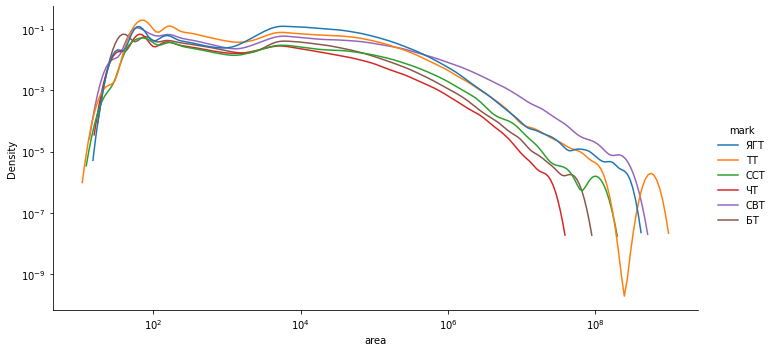

In [6]:
sns.displot(df, x='area', hue='mark', kind='kde', log_scale=[True, True], aspect=10/5)

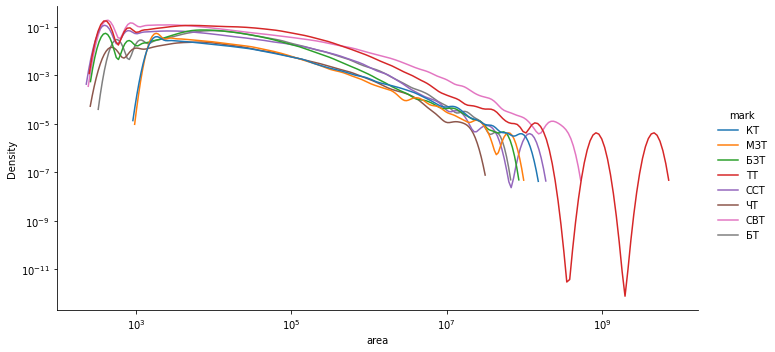

In [7]:
sns.displot(df_2, x='area', hue='mark', kind='kde', log_scale=[True, True], aspect=10/5)

## Построение графиков

### Таблицы данных WorldCover

Построим таблицу с интервалами размеров озер и их суммарными площадями в каждой арктической зоне

In [8]:
# Создание интервалов площадей озер

bins = [
500,
1000,
2000,
5000,
10000,
20000,
50000,
100000,
200000,
500000,
1000000,
2000000,
5000000,
10000000,
20000000,
50000000,
100000000
]

labels = [
'5×10²-10³',
'10³-2×10³',
'2×10³-5×10³',
'5×10³-10⁴',
'10⁴-2×10⁴',
'2×10⁴-5×10⁴',
'5×10⁴-10⁵',
'10⁵-2×10⁵',
'2×10⁵-5×10⁵',
'5×10⁵-10⁶',
'10⁶-2×10⁶',
'2×10⁶-5×10⁶',
'5×10⁶-10⁷',
'10⁷-2×10⁷',
'2×10⁷-5×10⁷',
'5×10⁷-10⁸'
]

df_grouped = pd.DataFrame ({
'label': labels
})

# Группировка данных по интервалам и вычисление суммы площадей в каждой группе

zones = ['ЯГТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ']

for el in zones:
    categories = pd.cut(df.query('mark == @el')['area'].rename(index=None), bins, labels=labels)
    grouped = df.query('mark == @el').groupby(categories)['area'].sum().reset_index() 
    grouped.columns = ['label', el]
    df_grouped = df_grouped.merge(grouped, on='label')

df_grouped

,label,ЯГТ,ТТ,ССТ,СВТ,ЧТ,БТ
0,5×10²-10³,1.350778e+07,2.544814e+07,8.838912e+06,1.533915e+07,9.870524e+06,1.234704e+07
1,10³-2×10³,3.481061e+07,4.037528e+07,1.539575e+07,2.499038e+07,1.763942e+07,1.800960e+07
2,2×10³-5×10³,2.948457e+08,2.004275e+08,7.976101e+07,1.445832e+08,7.873722e+07,9.096256e+07
3,5×10³-10⁴,6.567159e+08,4.044765e+08,1.544050e+08,3.108490e+08,1.404904e+08,2.163466e+08
4,10⁴-2×10⁴,1.184220e+09,7.101886e+08,2.485557e+08,5.270550e+08,2.098866e+08,3.634379e+08
5,2×10⁴-5×10⁴,2.998549e+09,1.935847e+09,6.516057e+08,1.417984e+09,4.471378e+08,8.048179e+08
6,5×10⁴-10⁵,3.687039e+09,2.562830e+09,8.767539e+08,2.045526e+09,4.952294e+08,8.662322e+08
7,10⁵-2×10⁵,4.745330e+09,3.433359e+09,1.231661e+09,3.134419e+09,5.631532e+08,1.005296e+09
8,2×10⁵-5×10⁵,6.903300e+09,5.167388e+09,2.018162e+09,5.994870e+09,7.964295e+08,1.408582e+09
9,5×10⁵-10⁶,4.678902e+09,3.614151e+09,1.503823e+09,5.685975e+09,5.516244e+08,9.129212e+08


Построим таблицу с интервалами размеров озер и их количеством в каждой арктической зоне

In [9]:
df_grouped_count = pd.DataFrame ({
'label': labels
})

# Группировка данных по интервалам и вычисление количества озер в каждой группе

zones = ['ЯГТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ']

for el in zones:
    categories = pd.cut(df.query('mark == @el')['area'].rename(index=None), bins, labels=labels)
    grouped = df.query('mark == @el').groupby(categories)['area'].count().reset_index() 
    grouped.columns = ['label', el]
    df_grouped_count = df_grouped_count.merge(grouped, on='label')

df_grouped_count

,label,ЯГТ,ТТ,ССТ,СВТ,ЧТ,БТ
0,5×10²-10³,18946,36102,12492,21790,13940,17489
1,10³-2×10³,23207,28038,10564,17169,12189,12635
2,2×10³-5×10³,83339,57711,23160,41544,23045,25524
3,5×10³-10⁴,91478,56633,21681,43614,19824,30234
4,10⁴-2×10⁴,82737,49521,17455,36846,14800,25532
5,2×10⁴-5×10⁴,93101,59686,20021,43605,14093,25423
6,5×10⁴-10⁵,52163,36185,12304,28715,7036,12325
7,10⁵-2×10⁵,33848,24472,8727,22071,4049,7188
8,2×10⁵-5×10⁵,22578,16922,6532,19223,2612,4623
9,5×10⁵-10⁶,6828,5247,2179,8149,804,1337


### Таблицы данных Sentinel-2 и Landsat 8 

Построим таблицу с интервалами размеров озер и их суммарными площадями в каждой арктической зоне

In [10]:
df2_grouped = pd.DataFrame ({
'label': labels
})

# Группировка данных по интервалам и вычисление суммы площадей в каждой группе

zones = ['КТ', 'МЗТ', 'БЗТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ']

for el in zones:
    categories = pd.cut(df_2.query('mark == @el')['area'].rename(index=None), bins, labels=labels)
    grouped = df_2.query('mark == @el').groupby(categories)['area'].sum().reset_index() 
    grouped.columns = ['label', el]
    df2_grouped = df2_grouped.merge(grouped, on='label')

df2_grouped

,label,КТ,МЗТ,БЗТ,ТТ,ССТ,СВТ,ЧТ,БТ
0,5×10²-10³,0.000000e+00,0.000000e+00,4.942849e+06,1.709201e+07,1.367637e+07,3.062764e+07,3.184226e+06,4.084548e+06
1,10³-2×10³,1.751665e+07,2.225858e+07,1.146756e+07,4.394473e+07,4.224860e+07,6.373329e+07,8.558235e+06,1.662705e+07
2,2×10³-5×10³,4.480006e+07,5.459902e+07,1.019869e+08,2.054942e+08,1.214246e+08,2.205983e+08,3.898421e+07,8.441116e+07
3,5×10³-10⁴,6.833217e+07,8.765318e+07,2.227070e+08,3.447749e+08,1.739610e+08,3.099704e+08,7.308344e+07,2.093981e+08
4,10⁴-2×10⁴,1.015512e+08,1.268414e+08,4.084729e+08,6.446263e+08,2.665907e+08,4.750920e+08,1.139961e+08,4.035593e+08
5,2×10⁴-5×10⁴,2.129915e+08,2.603091e+08,8.172376e+08,1.676979e+09,5.870807e+08,1.040338e+09,2.245875e+08,8.301103e+08
6,5×10⁴-10⁵,2.213497e+08,2.550987e+08,7.631748e+08,2.093482e+09,6.777468e+08,1.292197e+09,2.318912e+08,8.419771e+08
7,10⁵-2×10⁵,2.629489e+08,2.608881e+08,8.086393e+08,2.763555e+09,9.256570e+08,1.948068e+09,2.701626e+08,9.586759e+08
8,2×10⁵-5×10⁵,3.569809e+08,3.266175e+08,9.524217e+08,4.094188e+09,1.475177e+09,3.664532e+09,4.103353e+08,1.416134e+09
9,5×10⁵-10⁶,2.997725e+08,2.344354e+08,5.360884e+08,2.875576e+09,1.049669e+09,3.536737e+09,3.154208e+08,9.568299e+08


Построим таблицу с интервалами размеров озер и их количеством в каждой арктической зоне

In [11]:
df2_grouped_count = pd.DataFrame ({
'label': labels
})

# Группировка данных по интервалам и вычисление количества озер в каждой группе

zones = ['КТ', 'МЗТ', 'БЗТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ']

for el in zones:
    categories = pd.cut(df_2.query('mark == @el')['area'].rename(index=None), bins, labels=labels)
    grouped = df_2.query('mark == @el').groupby(categories)['area'].count().reset_index() 
    grouped.columns = ['label', el]
    df2_grouped_count = df2_grouped_count.merge(grouped, on='label')

df2_grouped_count

,label,КТ,МЗТ,БЗТ,ТТ,ССТ,СВТ,ЧТ,БТ
0,5×10²-10³,0,0,6147,21349,17399,35856,3805,7206
1,10³-2×10³,9738,12363,8133,30328,28393,42767,5496,11987
2,2×10³-5×10³,13232,16037,29939,62705,36923,68642,11471,24493
3,5×10³-10⁴,9479,12107,31047,48226,24455,43612,10155,28668
4,10⁴-2×10⁴,7014,8726,29008,45047,18807,33431,8037,28260
5,2×10⁴-5×10⁴,6723,8217,26079,52228,18468,32534,7158,26316
6,5×10⁴-10⁵,3155,3661,10959,29617,9554,18206,3317,12023
7,10⁵-2×10⁵,1898,1879,5860,19663,6591,13744,1928,6885
8,2×10⁵-5×10⁵,1158,1070,3170,13400,4787,11711,1340,4618
9,5×10⁵-10⁶,429,344,782,4188,1524,5078,462,1407


### Графики

In [12]:
# Переделываем таблицы в длинный вид
df_melted = df_grouped.melt(id_vars=['label'], value_vars=['ЯГТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ'], var_name='column', value_name='value')
df2_melted = df2_grouped.melt(id_vars=['label'], value_vars=['КТ', 'МЗТ', 'БЗТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ'], var_name='column', value_name='value')
df_count_melted = df_grouped_count.melt(id_vars=['label'], value_vars=['ЯГТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ'], var_name='column', value_name='value')
df2_count_melted = df2_grouped_count.melt(id_vars=['label'], value_vars=['КТ', 'МЗТ', 'БЗТ', 'ТТ', 'ССТ', 'СВТ', 'ЧТ', 'БТ'], var_name='column', value_name='value')

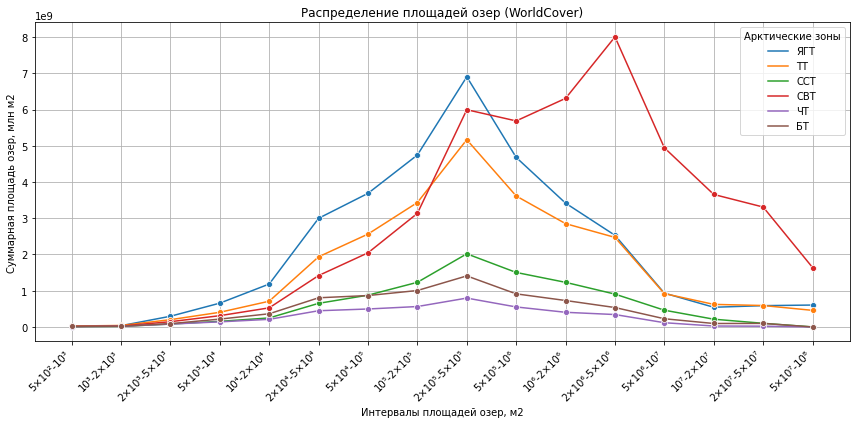

In [14]:
# График распределения площадей озер (WorldCover)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='label', y='value', hue='column', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Интервалы площадей озер, м2')
plt.ylabel('Суммарная площадь озер, млн м2')
plt.title('Распределение площадей озер (WorldCover)')
plt.grid(True)
plt.legend(title='Арктические зоны')
plt.tight_layout()
plt.show()

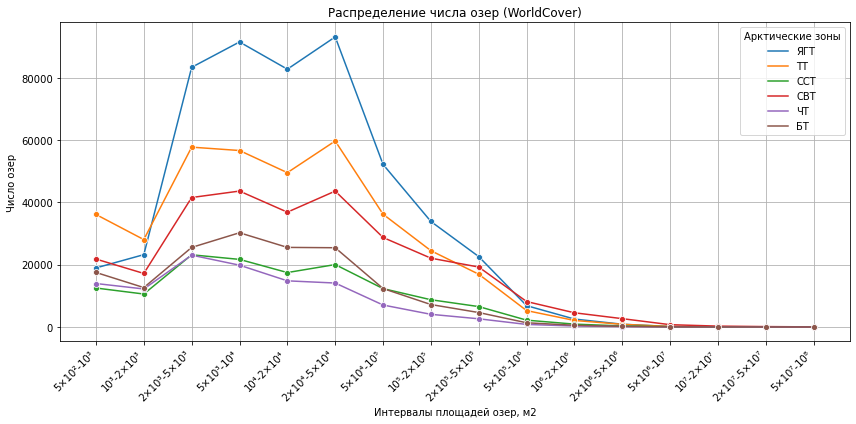

In [15]:
# График распределения числа озер (WorldCover)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_count_melted, x='label', y='value', hue='column', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Интервалы площадей озер, м2')
plt.ylabel('Число озер')
plt.title('Распределение числа озер (WorldCover)')
plt.grid(True)
plt.legend(title='Арктические зоны')
plt.tight_layout()
plt.show()

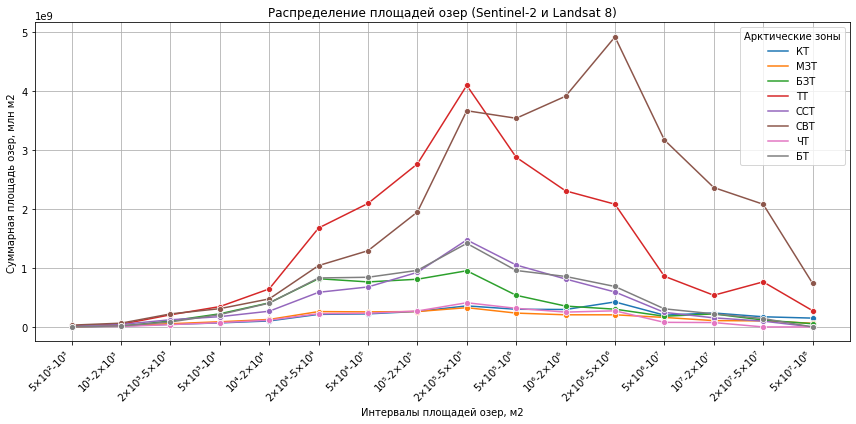

In [16]:
# График распределения площадей озер (Sentinel-2 и Landsat 8)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2_melted, x='label', y='value', hue='column', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Интервалы площадей озер, м2')
plt.ylabel('Суммарная площадь озер, млн м2')
plt.title('Распределение площадей озер (Sentinel-2 и Landsat 8)')
plt.grid(True)
plt.legend(title='Арктические зоны')
plt.tight_layout()
plt.show()

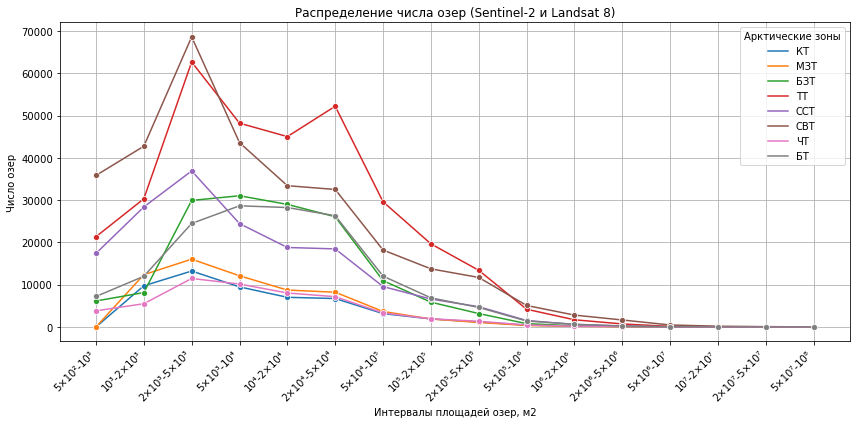

In [17]:
# График распределения числа озер (Sentinel-2 и Landsat 8)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2_count_melted, x='label', y='value', hue='column', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Интервалы площадей озер, м2')
plt.ylabel('Число озер')
plt.title('Распределение числа озер (Sentinel-2 и Landsat 8)')
plt.grid(True)
plt.legend(title='Арктические зоны')
plt.tight_layout()
plt.show()